# Seaborn Tutorial and Statistical analysis

**Date**: November 29th, 2017

**Speaker**: Victor Calderon [victor.calderon@vanderbilt.edu](mailto:victor.calderon@vanderbilt.edu)

## Description

In this tutorial, we will learn how to use [Seaborn](https://seaborn.pydata.org/) to plot attractive statistical graphics. We will also use [Pandas](http://pandas.pydata.org/) to extract the data.

The aim of the workshop is for it to be interactive, so feel free to ask any questions as we go.

The first thing that we must do is to __import specific modules__.<br>
The traditional modules are __`numpy`__, __`matplotlib`__, __`pandas`__, and for this case, __`seaborn`__

In [1]:
## Importing modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Now we can go ahead and import seaborn with a specific __context__ $\to$ `notebook`

In [2]:
## Now we can import `seaborn`
## We can import seaborn with a specific 
## 'context'. This will make the plots look
## better for an iPython notebook.
import seaborn as sns
sns.set()
sns.set_context('notebook', font_scale=1.5, rc={'text.usetex':True, 
                                                "lines.linewidth": 2.5, 
                                                'text.latex.unicode':True})

## Dataset

The next step is to download a dataset. Seaborn comes with already _pre-installed_ datasets, which are easy to access.
We will be working with the __Titanic__ dataset.

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


This dataset contains several columns, each one showing a detail a _specific person_.

In [4]:
titanic.columns.tolist()

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

To look at the total number of passengers of titanic, one can look at the `titanic.shape` attribute:

In [5]:
print('There are a total of {0} passengers, each with a total of {1} attributes'.format(*titanic.shape))

There are a total of 891 passengers, each with a total of 15 attributes


Note: I'm renaming two columns to make it easier

In [6]:
titanic.loc[:,'Adult Male'] = titanic['adult_male']
titanic.loc[:,'Embark Town'] = titanic['embark_town']

__Full description__ of the __full__ _Titanic_ dataset (from [Kaggle.com](https://www.kaggle.com/c/titanic/data))

![](./data/Titanic_Description.png)

## Analyzing the dataset

Now that we have the dataset, we can start by asking the __real questions__:

- How many men, women, and children were there on the Titanic?
- How old were they?
- How much did they pay for their fare?
- How many were in first class? Second class?
- Did they survive?
- Were they by themselves or with friends/family members?
- etc.

All of these questions can be answered using `Seaborn` and `Pandas`.

Let's go ahead and answer these questions:

---

In [7]:
## Just defining the colors to use in the plots
pal = dict(man="#4682B4", woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")

### How many men, women, and children were there on the Titanic

This is a simple questions that can be answered using _bar charts_.

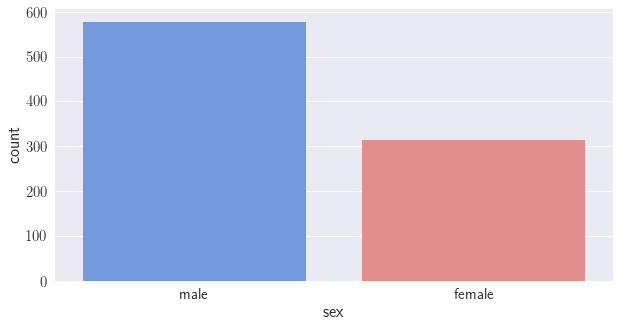

In [8]:
fig = plt.figure(figsize=(10,5))
sns.countplot('sex', data=titanic, palette=pal)

We can look at the distribution of ages for the passengers on the Titanic, and figure out how many 
men, women, and children were on board.
This can be done with the same function, but this time we will be using the key __`who`__ from the dataset.

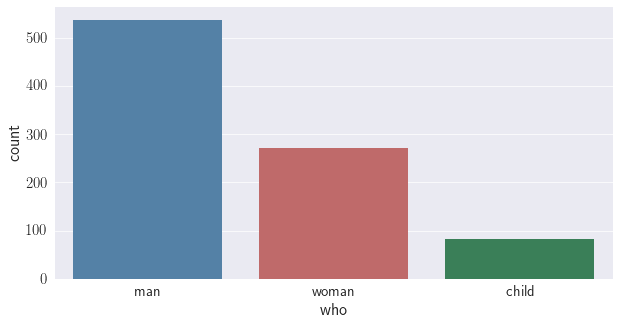

In [9]:
fig = plt.figure(figsize=(10,5))
sns.countplot('who', data=titanic, palette=pal)

To make it more complete, let's look at the gender of the children

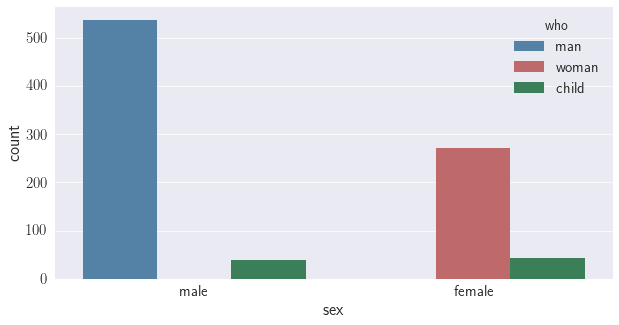

In [10]:
fig = plt.figure(figsize=(10,5))
sns.countplot('sex', hue='who', data=titanic, palette=pal)

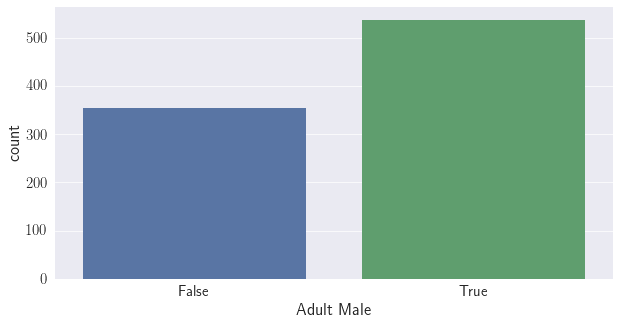

In [11]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Adult Male', data=titanic)

### How old were they?

In this part, we can look at the age distribution for each of the different classes in the dataset

First, we want to know the distribution of ages among males and females:

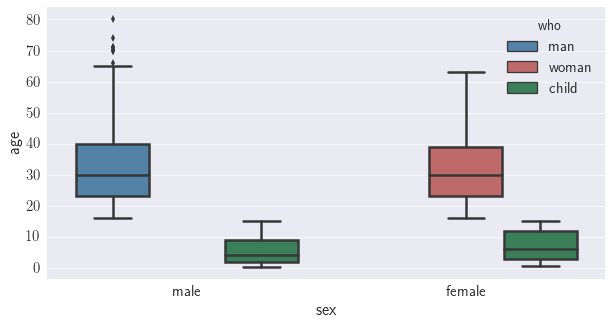

In [12]:
fig = plt.figure(figsize=(10,5))
sns.boxplot('sex', 'age', hue='who', data=titanic, palette=pal)

A better way to visualize this with a __violinplot__:

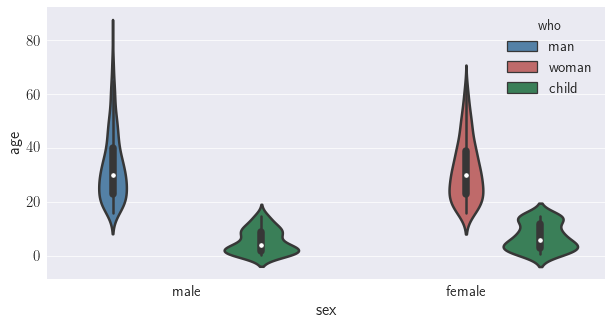

In [13]:
fig = plt.figure(figsize=(10,5))
sns.violinplot('sex', 'age', hue='who', data=titanic, palette=pal)

We can look at the distributions of __ages__ for both males and females.
We can always add different functions to the `FacetGrid`.

This is an example of a KDE-plot for the males and females. Each datapoint is _also_ being 
plotted as a `stick` on the x-axis.

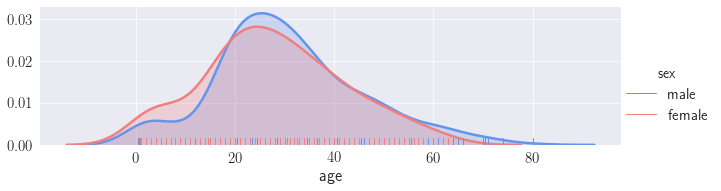

In [14]:
fg = sns.FacetGrid(titanic, hue='sex', aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.map(sns.rugplot, "age")

## Adding the legend
fg.add_legend()

We can do the same plot for the different types of __`who`__ or __`embark_town`__

__`FacetGrid`__ is really powerfull, in that it can show you different statistics for 
a subsample of your dataset.

Let's say we break it down in terms of __sex__ and __age__.
We can have the _column_ be `sex` and the _rows_ be the `class`, i.e. first, second, and third class.

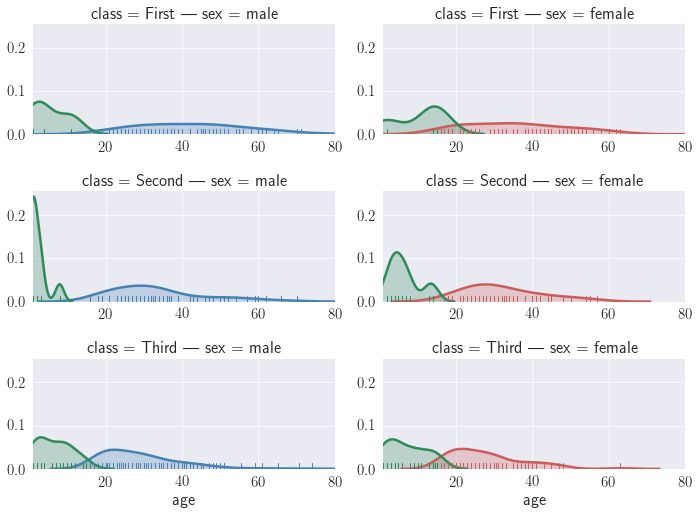

In [15]:
fg = sns.FacetGrid(titanic, col='sex', row='class', hue='who', size=2.5, aspect=2, palette=pal)
fg.map(sns.kdeplot, 'age', shade=True)
fg.map(sns.rugplot, 'age')
fg.set(xlim=(1, 80));


### Survival - Different factors that may have influence if a person survived or not

With this dataset, one can see if a person survived or not, and whether or not other 
parameters influenced this result.

First, we can look at the total __age__ for the ones that survived or not.

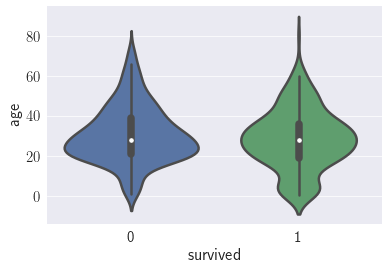

In [16]:
sns.violinplot('survived', 'age', data=titanic)

Or another whay of visualizing this is to look at regression model fitted to the data.
Seaborn lets you do a regression analysis on the data and estimates the errors for you.

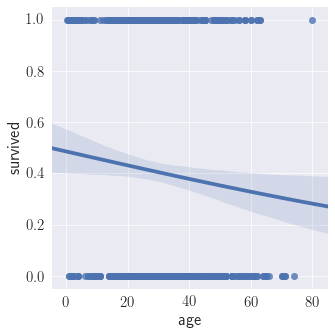

In [17]:
sns.lmplot('age', 'survived', titanic, logistic=True)

We can visualize how `sex` and `class` affected the survival rate of the passengers.
We will use __bins__ for the age to look at how the survival rates of _men_ and _women_ as 
functions of age.

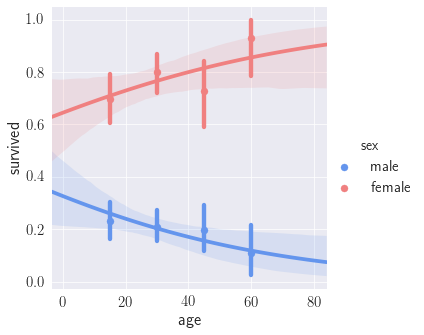

In [18]:
sns.lmplot('age','survived',titanic, hue='sex',
          palette=pal, logistic=True,
          x_bins=[15, 30, 45, 60])

Another property that may have influence these rates was probably __class__.
We can do a similar plot for the __class__ instead.

In [19]:
## Make a similar plot as to the one above, but use 'class' instead of 'sex'




#### "Women and Children first"

With this dataset, one can see if the children were evacuated or not.
We can look at their __class__ to see this

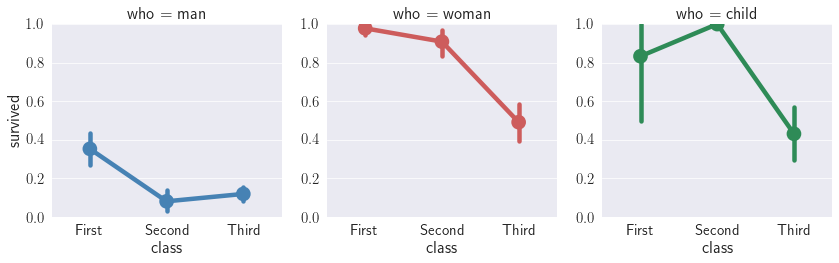

In [20]:
fg = sns.factorplot('class', 'survived', data=titanic,
                    hue='who', col='who',
                   palette=pal)
fg.set(ylim=(0,1))
fg.despine(left=True)

This is useful to know. Most of the children who were in _first_ and _second_ class survived, while only 
40% of those in _third_ class did not.

### Were they by themselves? Or with family members?

One can also look at the number of siblings and parents on board, and see if that had 
anything to do with the passenger' survival.

#### Number of siblings

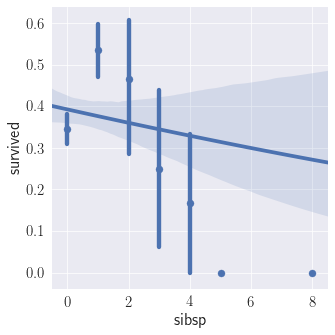

In [21]:
sns.lmplot('sibsp', 'survived', titanic, x_estimator=np.mean, logistic=True)

## Other datasets and more Seaborn functions

### The Iris Dataset

One can only do so much with a dataset. The _Titanic_ dataset has plenty of 
good information, but for some of the plots that seaborn has, this dataset is 
not the best.

Let's try with other dataset, i.e. the __iris__ dataset.

This dataset consists of __3 different types of irises__ (Setosa, Versicolour, and 
Virginica) petal and sepal length.

There are about ~1500 different samples

In [27]:
iris = sns.load_dataset('iris')

## Renaming columns
iris_cols = iris.columns.values
iris = iris.rename(columns=dict(zip(iris_cols, [x.replace('_',' ') for x in iris_cols])))

In [28]:
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's look at a __kernel density__ plot of `sepal width` and `sepal length`

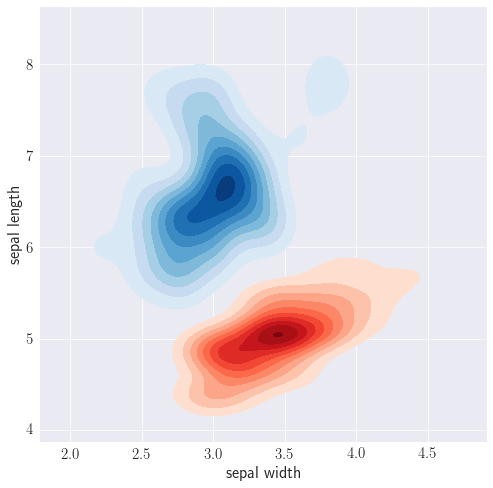

In [36]:
fig = plt.figure(figsize=(8,8))

## Determining our sample
setosa    = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

ax = sns.kdeplot(setosa['sepal width'], setosa['sepal length'],
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica['sepal width'], virginica['sepal length'],
                 cmap="Blues", shade=True, shade_lowest=False)

You can look at the __correlations of the different properties__.

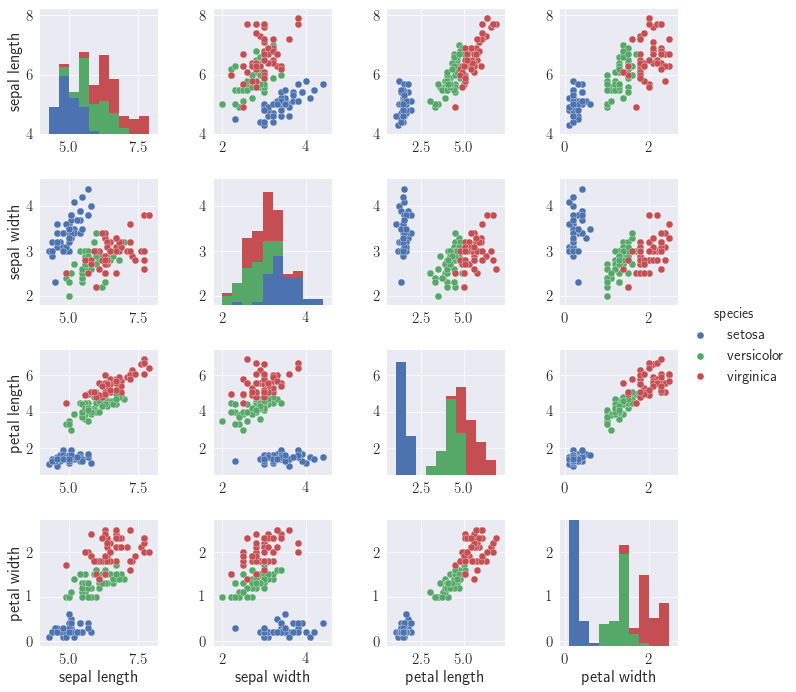

In [46]:
sns.pairplot(iris, hue='species')

Or maybe you want to also have the __KDE__'s of the correlations

/Users/victor2/anaconda/envs/vidl_viz/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


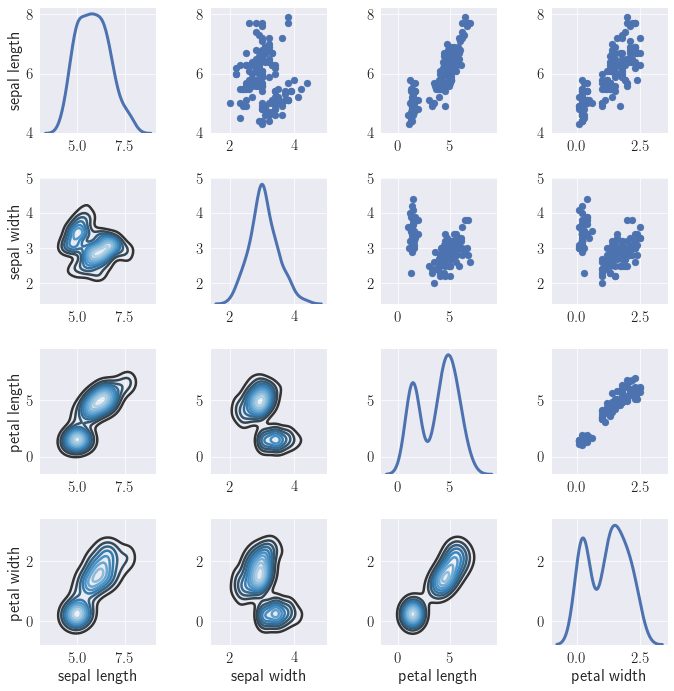

In [53]:
g = sns.PairGrid(iris, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Or maybe you want to visualize all of them in a single plot

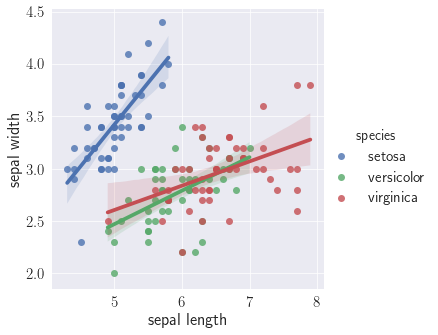

In [60]:
fig = plt.figure(figsize=(10,10))
g = sns.lmplot(x="sepal length", y="sepal width", hue="species",
               truncate=True, size=5, data=iris)